In [1]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from matplotlib import pyplot

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("swat.csv")
df = df.iloc[:5*len(df.index)//8]
#df = df.iloc[:7500]

y = df["Normal/Attack"]
del df["Normal/Attack"]

In [15]:
df.shape

(281199, 52)

In [3]:
X = np.array(df)
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [4]:
visible = Input(shape=(n_inputs,))

e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

output = Dense(n_inputs, activation='linear')(d)

In [6]:
model = Model(inputs=visible, outputs=output)

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, X_train, epochs=100, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Train on 188403 samples, validate on 92796 samples
Epoch 1/5


2021-11-20 21:19:13.343912: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


188403/188403 - 86s - loss: 0.0066 - val_loss: 0.0035
Epoch 2/5
188403/188403 - 80s - loss: 0.0018 - val_loss: 0.0019
Epoch 3/5
188403/188403 - 84s - loss: 0.0013 - val_loss: 0.0012
Epoch 4/5
188403/188403 - 81s - loss: 0.0010 - val_loss: 0.0012
Epoch 5/5
188403/188403 - 82s - loss: 9.0082e-04 - val_loss: 8.9838e-04


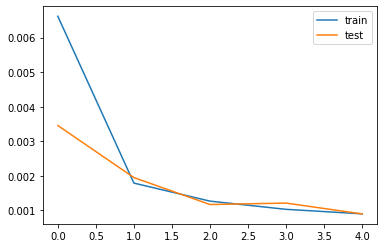

In [7]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [8]:
encoder = Model(inputs=visible, outputs=bottleneck)

encoder.save('encoder.h5')

In [9]:
#PREDICT
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

In [10]:
encoder = load_model('encoder.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)

In [18]:
df = np.concatenate((X_train_encode, X_test_encode))

(281199, 26)
(92796, 26)
<class 'numpy.ndarray'>


In [12]:
#TADGAN HERE! GET THE Y_HAT
from optimum import main

In [13]:
acc = accuracy_score(y_test, yhat)
print(acc)

NameError: name 'yhat' is not defined